# EXERCISE: Glass Identification (aka "Glassification")

In [1]:
# manipulations 
import pandas as pd
import numpy as np
#stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

#visuals
import seaborn as sns
import matplotlib.pyplot as plt

## TASK 1: read the data into a DataFrame

In [2]:
# read data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
df = pd.read_csv(url, names=col_names, index_col='id')

## TASK 2: briefly explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ri          214 non-null    float64
 1   na          214 non-null    float64
 2   mg          214 non-null    float64
 3   al          214 non-null    float64
 4   si          214 non-null    float64
 5   k           214 non-null    float64
 6   ca          214 non-null    float64
 7   ba          214 non-null    float64
 8   fe          214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [4]:
df.describe()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


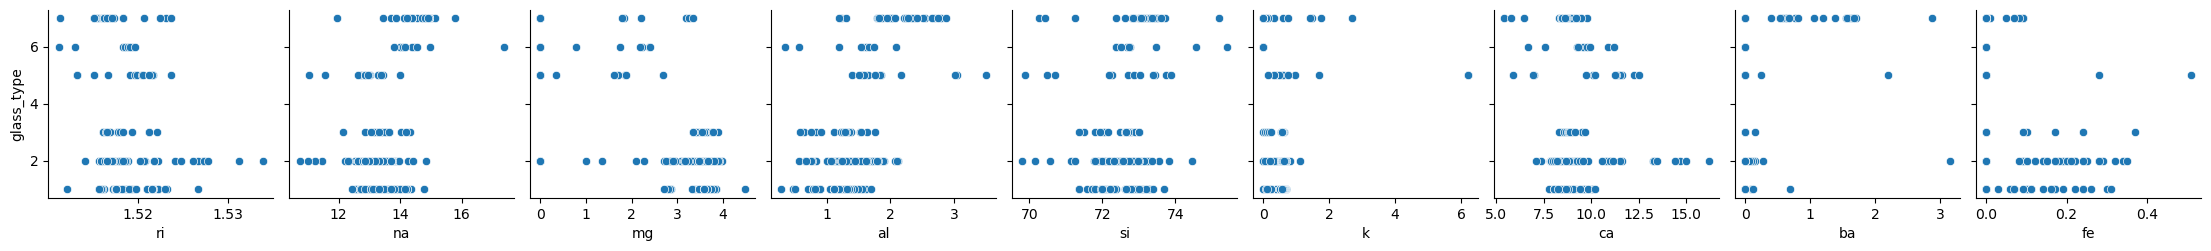

In [5]:
# scatter plot in Seaborn
sns.pairplot(df, x_vars=['ri','na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe'], y_vars='glass_type')





/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


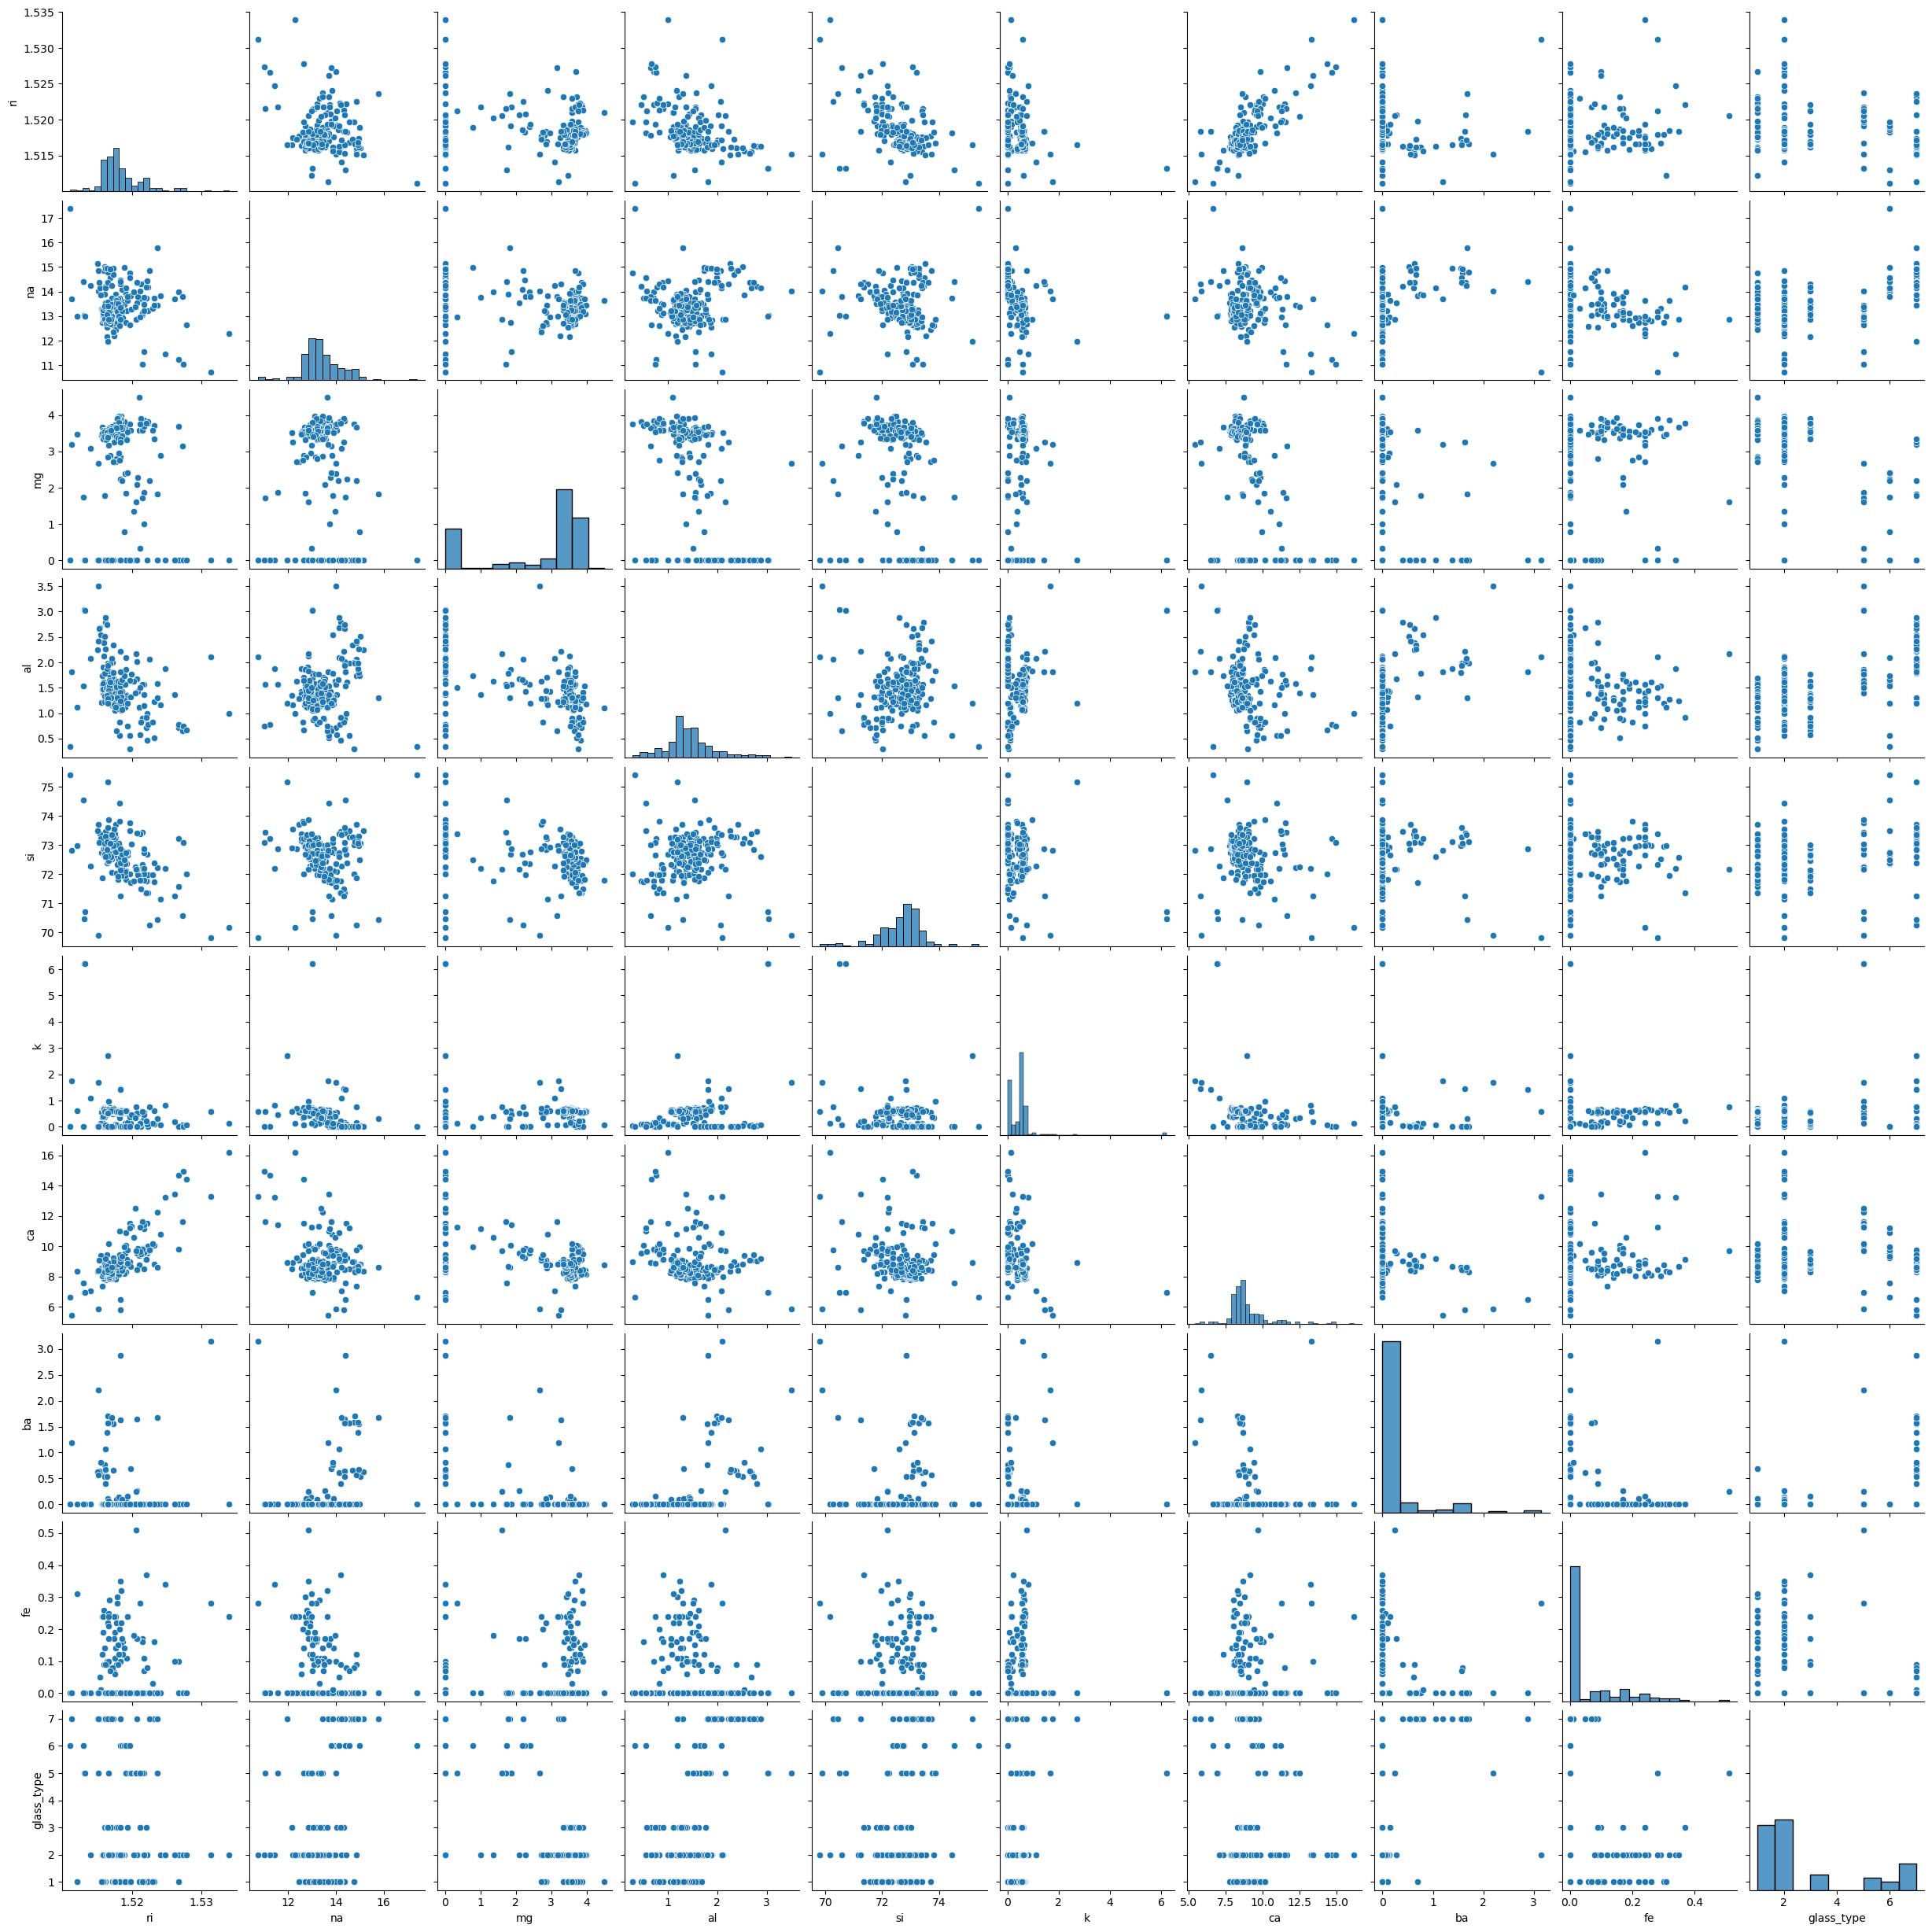

In [6]:
# scatter matrix in Seaborn
sns.pairplot(df)

<Axes: >

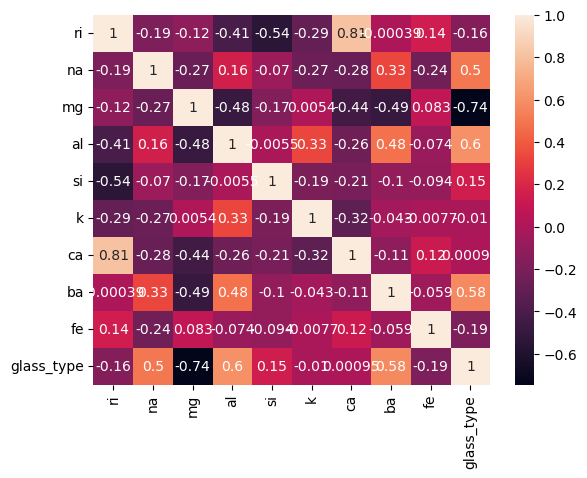

In [7]:
sns.heatmap(df.corr(), annot=True)

## TASK 3: convert into binary classification problem 

Convert this into a binary classification problem. Create a new DataFrame column called "binary":
1.	If type of glass = 1/2/3/4, set binary = 0.
2.	If type of glass = 5/6/7, set binary = 1.

In [8]:
# Define a function to map glass types to binary labels
def map_to_binary(glass_type):
    if glass_type in [1, 2, 3, 4]:
        return 0
    else:
        return 1

# Apply the function to create the binary column
df['binary'] = df['glass_type'].apply(map_to_binary)


In [9]:
df

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,binary
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1


## TASK 4: create a feature matrix (X) using all features 

In [10]:
feature_cols = ['ri','na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe']
X = df[feature_cols]

## TASK 5: create a response vector (y)

In [11]:
y = df.binary

In [24]:
y

id
1      0
2      0
3      0
4      0
5      0
      ..
210    1
211    1
212    1
213    1
214    1
Name: binary, Length: 214, dtype: int64

## TASK 6: split X and y into training and testing set

In [12]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44)

In [25]:
y_train

id
38     0
82     0
7      0
194    1
157    0
      ..
132    0
60     0
174    1
164    1
21     0
Name: binary, Length: 160, dtype: int64

In [30]:
y_test.value_counts()

binary
0    42
1    12
Name: count, dtype: int64

## TASK 7: fit a KNN model on the training set using K=5

In [13]:
# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# print (metrics.accuracy_score(y_test, y_pred))

KNeighborsClassifier()

## TASK 8: make predictions on the testing set and calculate testing accuracy

In [14]:
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.9444444444444444


In [15]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

## TASK 9: write a for loop that computes testing accuracy for a range of K values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data into features (X) and target variable (y)
# X = df.drop(['glass_type', 'binary'], axis=1)  # Features
# y = df['binary']  # Target variable

# Define range of K values
k_values = range(1, 21)  # Assuming you want to test K from 1 to 20

# Initialize a list to store testing accuracies for each K
testing_accuracies = []

# Loop over each K value
for k in k_values:
    # Split data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = knn.predict(X_test)
    
    # Compute testing accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy to the list
    testing_accuracies.append(accuracy)

# Print testing accuracies for each K value
for k, accuracy in zip(k_values, testing_accuracies):
    print(f"K = {k}: Testing Accuracy = {accuracy}")


K = 1: Testing Accuracy = 0.9814814814814815
K = 2: Testing Accuracy = 0.9629629629629629
K = 3: Testing Accuracy = 0.9444444444444444
K = 4: Testing Accuracy = 0.9259259259259259
K = 5: Testing Accuracy = 0.9444444444444444
K = 6: Testing Accuracy = 0.9629629629629629
K = 7: Testing Accuracy = 0.9444444444444444
K = 8: Testing Accuracy = 0.9629629629629629
K = 9: Testing Accuracy = 0.9629629629629629
K = 10: Testing Accuracy = 0.9259259259259259
K = 11: Testing Accuracy = 0.9444444444444444
K = 12: Testing Accuracy = 0.9444444444444444
K = 13: Testing Accuracy = 0.9259259259259259
K = 14: Testing Accuracy = 0.9444444444444444
K = 15: Testing Accuracy = 0.9444444444444444
K = 16: Testing Accuracy = 0.9444444444444444
K = 17: Testing Accuracy = 0.9444444444444444
K = 18: Testing Accuracy = 0.9444444444444444
K = 19: Testing Accuracy = 0.9444444444444444
K = 20: Testing Accuracy = 0.9444444444444444


## TASK 10: plot K value versus testing accuracy to choose on optimal value for K

Text(0, 0.5, 'Testing Accuracy')

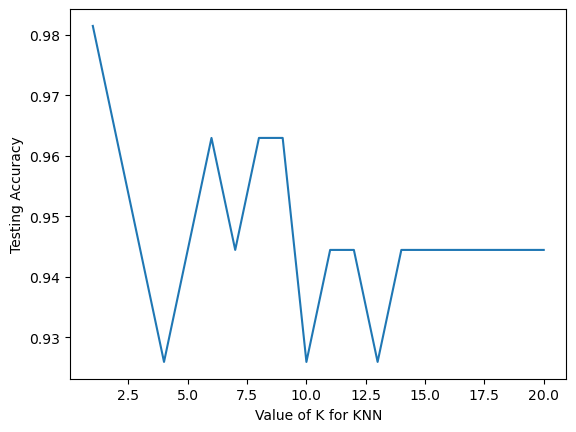

In [20]:
%matplotlib inline


import matplotlib.pyplot as plt
plt.plot(k_values, testing_accuracies)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


## TASK 11: calculate the null accuracy (see instructions for explanation)

In [21]:
df.binary.value_counts()

binary
0    163
1     51
Name: count, dtype: int64

## TASK 12: search for useful features

In [22]:
# redo exercise using only those features
feature_cols = ['mg','ba']

In [23]:
df.corr()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,binary
ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237,-0.134327
na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898,0.452336
mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993,-0.758289
al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829,0.585928
si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565,0.148072
k,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054,0.053774
ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952,0.040670
ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161,0.523403
fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278,-0.194903
glass_type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000,0.941680
